In [3]:
import numpy as np

Replicar los resultados del trabajo “A Markov Chain Model for Covid-19 Survival Analysis”.

1. Implementar las soluciones planteadas en el trabajoen las secciones `2.0 A Simple Markov Chain` y `3.0 A More Complex Markov Chain`.
2. Realizarlas visualizaciones que consideren necesarias para mostrar los resultados.
3. Para la cadena de Markov propuesta encada sección mostrar la evolución de 10 individuos a lo largo del tiempo (100 días).
4. Para una población de 10.000 individuos, grafique las curvas de evolución de cada uno de los estados aplicando las cadenas de Markov propuestas por el trabajo.

### A Simple Markov Chain

In [4]:
m_efficient = np.array([
    [0.95, 0.05, 0], 
    [0.1, 0.7, 0.2],
    [0, 0.3, 0.7],
])

m_inefficient = np.array([
    [0.9, 0.1, 0], 
    [0.12, 0.7, 0.18],
    [0, 0.2, 0.8],
])

In [5]:
m_pow_efficient = np.linalg.matrix_power(m_efficient, 1000)
m_pow_inefficient = np.linalg.matrix_power(m_inefficient, 1000)

In [6]:
m_pow_efficient

array([[0.54545455, 0.27272727, 0.18181818],
       [0.54545455, 0.27272727, 0.18181818],
       [0.54545455, 0.27272727, 0.18181818]])

In [7]:
m_pow_inefficient

array([[0.38709677, 0.32258065, 0.29032258],
       [0.38709677, 0.32258065, 0.29032258],
       [0.38709677, 0.32258065, 0.29032258]])

### A More Complex Markov Chain

In [8]:
p_complex = np.array([
    [0.93, 0.07, 0.0, 0.0, 0.0], 
    [0.05, 0.8, 0.1, 0.05, 0.0],
    [0.0, 0.15, 0.8, 0.05, 0.0],
    [0.0, 0.0, 0.05, 0.8, 0.15],
    [0.0, 0.0, 0.0, 0.0, 1.0]
])

p_complex_reduced = np.array([
    [0.93, 0.07, 0.0, 0.0], 
    [0.05, 0.8, 0.1, 0.05],
    [0.0, 0.15, 0.8, 0.05],
    [0.0, 0.0, 0.05, 0.8],
])

In [9]:
states = ["Healthy", "Infected", "Hospitalized", "Ventilator", "Dead"]

In [10]:
for days in [2, 4, 8, 16]:
    print("Luego de {} dias:".format(days))
    p_pow = np.linalg.matrix_power(p_complex, days)
    for i, s in enumerate(states[:4]):
        print("--> Prob. de morir partiendo desde '{}' = {}".format(s, p_pow[i][4]))

Luego de 2 dias:
--> Prob. de morir partiendo desde 'Healthy' = 0.0
--> Prob. de morir partiendo desde 'Infected' = 0.0075
--> Prob. de morir partiendo desde 'Hospitalized' = 0.0075
--> Prob. de morir partiendo desde 'Ventilator' = 0.27
Luego de 4 dias:
--> Prob. de morir partiendo desde 'Healthy' = 0.0019057500000000003
--> Prob. de morir partiendo desde 'Infected' = 0.0366075
--> Prob. de morir partiendo desde 'Hospitalized' = 0.03785625000000001
--> Prob. de morir partiendo desde 'Ventilator' = 0.4441312500000001
Luego de 8 dias:
--> Prob. de morir partiendo desde 'Healthy' = 0.018546686137507505
--> Prob. de morir partiendo desde 'Infected' = 0.11850946319145003
--> Prob. de morir partiendo desde 'Hospitalized' = 0.12723774254568754
--> Prob. de morir partiendo desde 'Ventilator' = 0.6359090870334376
Luego de 16 dias:
--> Prob. de morir partiendo desde 'Healthy' = 0.09866836765994028
--> Prob. de morir partiendo desde 'Infected' = 0.28262544861109024
--> Prob. de morir partiendo de

![](./assets/Ej2-days_till_death.png)

In [11]:
np.linalg.matrix_power(p_complex, 1000)

array([[8.05351086e-11, 7.69484028e-11, 5.36127097e-11, 3.67212577e-11,
        1.00000000e+00],
       [5.49631448e-11, 5.25153101e-11, 3.65892985e-11, 2.50613160e-11,
        1.00000000e+00],
       [5.03601155e-11, 4.81172810e-11, 3.35250340e-11, 2.29624919e-11,
        1.00000000e+00],
       [1.41641469e-11, 1.35333335e-11, 9.42915843e-12, 6.45836703e-12,
        1.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00]])

In [12]:
edges = []
for i, s in enumerate(states):
    for j, t in enumerate(states):
        p = p_complex[i][j]
        if p!=0.0: 
            edges.append((s[:8], t[:8], p))

print(edges)

[('Healthy', 'Healthy', 0.93), ('Healthy', 'Infected', 0.07), ('Infected', 'Healthy', 0.05), ('Infected', 'Infected', 0.8), ('Infected', 'Hospital', 0.1), ('Infected', 'Ventilat', 0.05), ('Hospital', 'Infected', 0.15), ('Hospital', 'Hospital', 0.8), ('Hospital', 'Ventilat', 0.05), ('Ventilat', 'Hospital', 0.05), ('Ventilat', 'Ventilat', 0.8), ('Ventilat', 'Dead', 0.15), ('Dead', 'Dead', 1.0)]


In [13]:
{(x[0],x[1]):x[2] for x in edges}

{('Healthy', 'Healthy'): 0.93,
 ('Healthy', 'Infected'): 0.07,
 ('Infected', 'Healthy'): 0.05,
 ('Infected', 'Infected'): 0.8,
 ('Infected', 'Hospital'): 0.1,
 ('Infected', 'Ventilat'): 0.05,
 ('Hospital', 'Infected'): 0.15,
 ('Hospital', 'Hospital'): 0.8,
 ('Hospital', 'Ventilat'): 0.05,
 ('Ventilat', 'Hospital'): 0.05,
 ('Ventilat', 'Ventilat'): 0.8,
 ('Ventilat', 'Dead'): 0.15,
 ('Dead', 'Dead'): 1.0}

In [18]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import to_agraph 

G = nx.DiGraph()
G.add_weighted_edges_from(edges)

edgelabels={(x[0],x[1]):x[2] for x in edges}

# plt.figure(dpi=125)
# pos = nx.circular_layout(G)
# nx.draw_networkx_nodes(G, pos, node_size=1200, node_shape='o', node_color='#ff9900')
# nx.draw_networkx_edges(G, pos, arrows=True, arrowsize=10, connectionstyle='arc3,rad=0.2', min_source_margin=20, min_target_margin=20)
# nx.draw_networkx_labels(G, pos, font_size=8)
# nx.draw_networkx_edge_labels(G, pos, edge_labels=edgelabels)
# plt.show()

A = to_agraph(G)
A.layout('dot')
A.draw('ej_2_complex_fsm.png')

ImportError: requires pygraphviz http://pygraphviz.github.io/

In [22]:
A = nx.adj_matrix(G)
A = A.todense()
A = np.array(A, dtype = np.float64)
A

array([[0.93, 0.07, 0.  , 0.  , 0.  ],
       [0.05, 0.8 , 0.1 , 0.05, 0.  ],
       [0.  , 0.15, 0.8 , 0.05, 0.  ],
       [0.  , 0.  , 0.05, 0.8 , 0.15],
       [0.  , 0.  , 0.  , 0.  , 1.  ]])

In [62]:
import random

def calcular_estados_individuos(dias, individuos):
    resultados = {}
    for i in range(individuos):
        estado_actual = 0
        resultado_individuo = []
        for d in range(dias):
            resultado_individuo.append(estado_actual)
            r = random.choices(population=[0,1,2,3,4], weights=A[estado_actual], k=1)
            estado_actual = r[0]
        resultados[i] = resultado_individuo
    return resultados



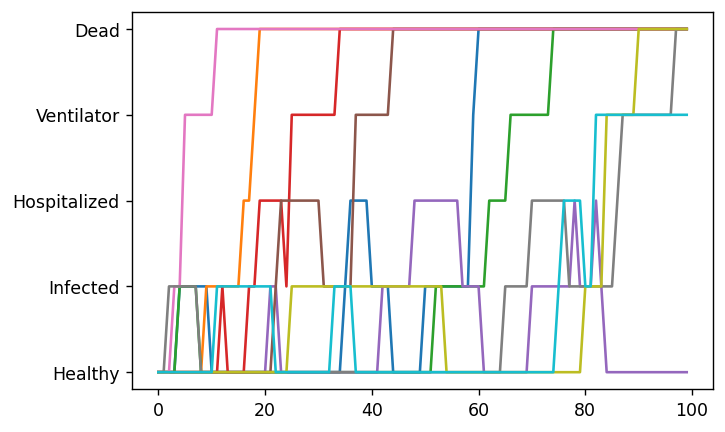

In [76]:
individuos = 10
dias = 100
estados_individuos = calcular_estados_individuos(dias, individuos)
ejex = list(range(dias))
plt.figure(dpi=125)
plt.yticks(np.arange(len(states)), states)

for i in range(individuos):
    ejey = estados_individuos[i]
    plt.plot(ejex, ejey, label= "individuo: " + str(i) )


In [79]:
individuos = 10000
dias = 100
estados_individuos = calcular_estados_individuos(dias, individuos)

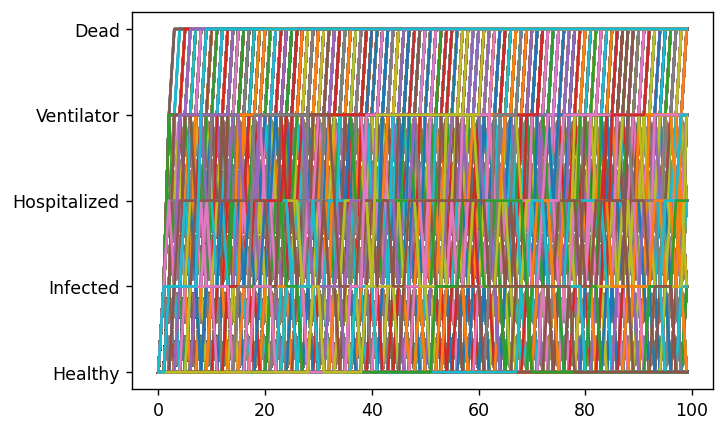

In [81]:
ejex = list(range(dias))
plt.figure(dpi=125)
plt.yticks(np.arange(len(states)), states)

state_count = {
    0: [0]*dias,
    1: [0]*dias,
    2: [0]*dias,
    3: [0]*dias,
    4: [0]*dias,
}

for i in range(individuos):
    ejey = estados_individuos[i]
    for index, state in enumerate(ejey):
        state_count[state][index] += 1
    plt.plot(ejex, ejey, label= "individuo: " + str(i))


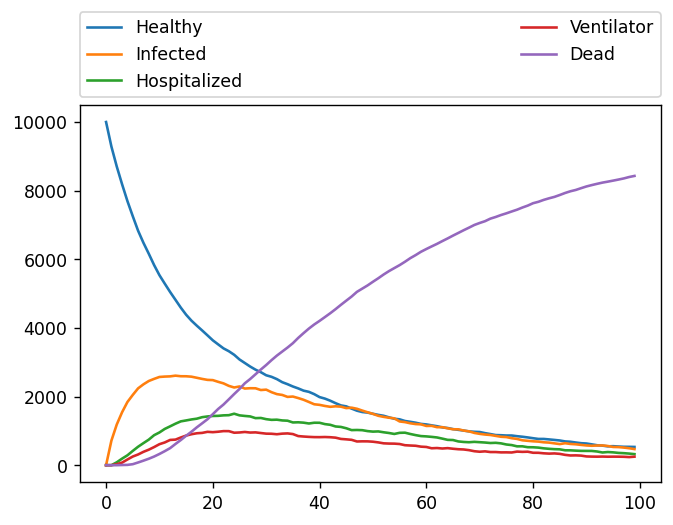

In [93]:
plt.figure(dpi=125)
for k,v in state_count.items():
    plt.plot(v, label=states[k])
    
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)